Импорт

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import joblib
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Векторизуем данные

In [3]:
data = pd.read_csv('csv_data\\cleaned_dataset.csv')

In [4]:
tv  = joblib.load('review-predictor\\vectorizer_random_forest.pkl')
X = tv.transform(data['Review']).toarray()
Y = data['Sentiment']

Делим на обучающую и тестовую выборки

In [5]:
x_train ,x_test,y_train,y_test = train_test_split(X,Y,
                                                test_size=0.25 ,
                                                random_state=42)

Тренируем модель логической регрессии

In [6]:
model=LogisticRegression()
 
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(metrics.accuracy_score(y_test,pred))

0.8842895182764464


Зависимость точности от длины

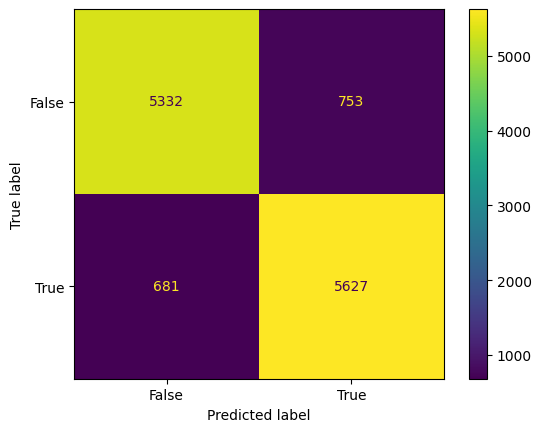

In [7]:
cm = metrics.confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [8]:
metrics.accuracy_score(y_test, pred)

0.8842895182764464

In [10]:
metrics.f1_score(y_test, pred)

0.8869798234552333

In [ ]:
metrics.precision_score(y_test, pred)

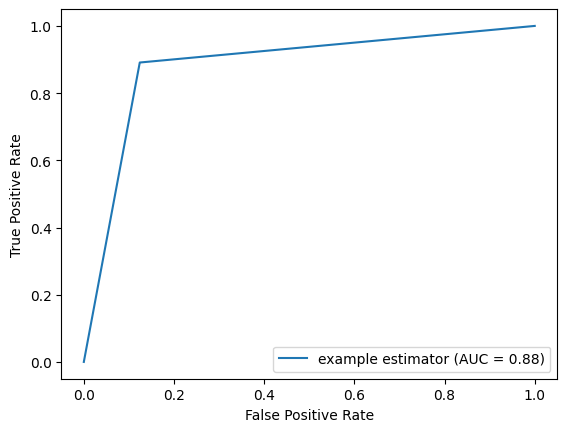

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [8]:
joblib.dump(model, 'logregression.joblib') 

['logregression.joblib']